# Table of Contents
* [1. Introduction](#1.-Introduction)
	* [1.1 What is an OpenAI gym environment object?](#1.1-What-is-an-OpenAI-gym-environment-object?)
		* [1.1.1 Methods:](#1.1.1-Methods:)
		* [1.1.2 Attributes:](#1.1.2-Attributes:)
	* [1.2 Useful Links](#1.2-Useful-Links)
* [2. Environement Examples](#2.-Environement-Examples)
	* [2.1 Algorithms: Copy-v0](#2.1-Algorithms:-Copy-v0)
		* [2.1.1 A heuristic solve!](#2.1.1-A-heuristic-solve!)
	* [2.2 Atari: Breakout-v0](#2.2-Atari:-Breakout-v0)


In [29]:
import gym
import matplotlib.pyplot as plt
import time
from IPython import display
import numpy as np

# 1. Introduction

Here's a practical introduction to OpenAI Gym Environments. You can find a list of the environments here:
* https://gym.openai.com/envs/

The code for them is located in `../gym/envs`

## 1.1 What is an OpenAI gym environment object?

Essentially it is just an object that has some standard methods and attributes

`env = gym.make('Name_of_registered_environment')`

### 1.1.1 Methods:

1. `env.reset()` - starts the environment, may return an initial state
2. `env.render()` - return a visual representation of the state
    * Often has an argument `mode` which can take on values:
        * env.render(mode='human')
        * env.render(mode='rgb_array')
3. `env.step(some_action)` - submit an action to the environment. Returns a tuple:
    * (observation, reward, done, info)
        * observation: new state
        * reward: ...
        * done: if game is episodic, is it finished
        * info: diagnostic information

### 1.1.2 Attributes:

1. `env.action_space` - a space object containing valid actions.
2. `env.observation_space` - a space object containing valid states. 
    * These space objects have some useful methods/attributes themselves:
        * `space.sample()` - return a random sample

## 1.2 Useful Links

* https://gym.openai.com/docs/
* https://gym.openai.com/envs/

# 2. Environement Examples

## 2.1 Algorithms: Copy-v0

In [2]:
env = gym.make('Copy-v0')
env.reset()
env.render()

Total length of input instance: 4, step: 0
Observation Tape    :   BEBC  
Output Tape         :   
Targets             :   BEBC  








In [3]:
env.action_space

Tuple(Discrete(2), Discrete(2), Discrete(5))

In [4]:
env.action_space.sample()

(0, 1, 0)

In [5]:
env.action_space

Tuple(Discrete(2), Discrete(2), Discrete(5))

In [6]:
env.observation_space

Discrete(6)

In [7]:
env.observation_space.sample()

3

In [8]:
env.render()

Total length of input instance: 4, step: 0
Observation Tape    :   BEBC  
Output Tape         :   
Targets             :   BEBC  








### 2.1.1 A heuristic solve!

In [9]:
obs = env.reset()  # initial state returned by reset
env.render()
while obs < 5:  # 5 is the null return
    obs, reward, done, _ = env.step((1, 1, obs))
    env.render()

Total length of input instance: 3, step: 0
Observation Tape    :   DBE  
Output Tape         :   
Targets             :   DBE  






Total length of input instance: 3, step: 1
Observation Tape    :   DBE  
Output Tape         :   D
Targets             :   DBE  

Current reward      :   1.000
Cumulative reward   :   1.000
Action              :   Tuple(move over input: right,
                              write to the output tape: True,
                              prediction: D)
Total length of input instance: 3, step: 2
Observation Tape    :   DBE  
Output Tape         :   DB
Targets             :   DBE  

Current reward      :   1.000
Cumulative reward   :   2.000
Action              :   Tuple(move over input: right,
                              write to the output tape: True,
                              prediction: B)
Total length of input instance: 3, step: 3
Observation Tape    :   DBE  
Output Tape         :   DBE
Targets             :   DBE  

Current reward      :   1.000
C

## 2.2 Atari: Breakout-v0

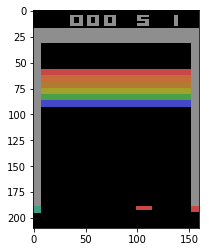

In [22]:
env = gym.make('Breakout-v0')
state = env.reset()
# env.render()  # haven't quite worked out how to get this to work within notebook
                # it will work outside the notebook when call has access to screen
plt.imshow(env.render(mode='rgb_array'))

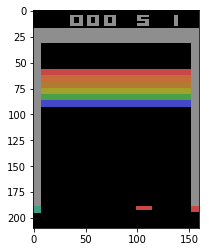

In [11]:
plt.imshow(state)

In [12]:
env.action_space, env.observation_space

(Discrete(4), Box(210, 160, 3))

### Random Policy

KeyboardInterrupt: 

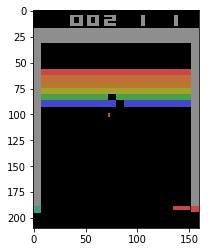

In [13]:
fig, ax = plt.subplots(1,1)
state = env.reset()
for t in range(100):
    ax.imshow(state)
    display.display(fig)
    display.clear_output(wait=True)
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break

## Box2D: CarRacing-v0 

In [26]:
env = gym.make('CarRacing-v0')
# state = env.reset()
# env.render()  # haven't quite worked out how to get this to work within notebook
                # it will work outside the notebook when call has access to screen
# env.render(mode='rgb_array')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [27]:
env.reset()

Track generation: 1253..1570 -> 317-tiles track


NotImplementedError: abstract

In [32]:
from pyglet.window import key
from gym.envs.box2d import CarRacing
a = np.array( [0.0, 0.0, 0.0] )
def key_press(k, mod):
    global restart
    if k==0xff0d: restart = True
    if k==key.LEFT:  a[0] = -1.0
    if k==key.RIGHT: a[0] = +1.0
    if k==key.UP:    a[1] = +1.0
    if k==key.DOWN:  a[2] = +0.8   # set 1.0 for wheels to block to zero rotation
def key_release(k, mod):
    if k==key.LEFT  and a[0]==-1.0: a[0] = 0
    if k==key.RIGHT and a[0]==+1.0: a[0] = 0
    if k==key.UP:    a[1] = 0
    if k==key.DOWN:  a[2] = 0
env = CarRacing()
env.render()
record_video = False
if record_video:
    env.monitor.start('/tmp/video-test', force=True)
env.viewer.window.on_key_press = key_press
env.viewer.window.on_key_release = key_release
while True:
    env.reset()
    total_reward = 0.0
    steps = 0
    restart = False
    while True:
        s, r, done, info = env.step(a)
        total_reward += r
        if steps % 200 == 0 or done:
            print("\naction " + str(["{:+0.2f}".format(x) for x in a]))
            print("step {} total_reward {:+0.2f}".format(steps, total_reward))
            #import matplotlib.pyplot as plt
            #plt.imshow(s)
            #plt.savefig("test.jpeg")
        steps += 1
        if not record_video: # Faster, but you can as well call env.render() every time to play full window.
            env.render()
        if done or restart: break
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


NotImplementedError: abstract